# DTMC: Section 2 - Mathematical Concepts

In Section 1, we introduced a toy model of a “rat” moving randomly around a ”maze” and looked at a simulated sample path.  

In this section, we will introduce some concepts that help us describe the *stochastic process* that represents the random path of the rat in the maze.  These are concepts that are fundamental to Markov chains, which are the underlying theme of this course.

Remember that the stochastic process is denoted $\{X_n\}$ (or $\{X_n, n \geq 0\}$) is a sequence of random variables:

$$ (X_0, X_1, X_2, \dots) $$

where $X_n$ represents the room the rat is in after the $n$th move (so $X_0$ is the starting position of the rat) and the time index $n$ may take values $0, 1, 2, \dots$.

## State Space

This is the set of values that a stochastic process can move among (you can think of these as “locations” but in the abstract, just needs to be a number and does not have to represent any sort of physical location).

**Notation:** We denote the state space of a Markov chain as $\mathcal{S}$.

For the rat in the maze example of Section 1, the state space is

$$ \mathcal{S} = \{1, 2, 3, 4\} $$

where each state represents a particular room in the maze.

## Transition Probabilities

Each random variable $X_n$ in the sequence represents the location of the stochastic process (in the state space) at a time $n$.

We can think of a time step as a transition:
* $X_0 \to X_1$: one-step transition (or $X_n \to X_{n+1}$)
* $X_0 \to X_2$: two-step transition (or $X_n \to X_{n+2}$)
* ...
* $X_0 \to X_m$: $m$-step transition (or $X_n \to X_{n+m}$)

and define the *transition probability* $p_{ij}$ using conditional probability:
$$ p_{ij} \overset{\mathsf{def}}{=} \mathsf{P}\left(X_1 = j \,|\, X_0 = i\right) $$
The probability that the stochastic process next moves to state $j$ given that we are in state $i$.

Similarly, the $m$-step transition probability:
$$ \mathsf{P}\left(X_m = j \,|\, X_0 = i\right) $$

In Section 1, Exercise 1.2, you wrote out all the one-step transition probabilities in a table:

| one-step trans. prob. | to state 1  | to state 2   | to state 3   | to state 4   |
|:--- |:---:|:---:|:---:|:---:|
| from state 1 |  0  | 1/2 |  0  | 1/2 | 
| from state 2 | 1/2 |  0  | 1/2 |  0  |
| from state 3 |  0  | 1/2 |  0  | 1/2 | 
| from state 4 | 1/2 |  0  | 1/2 |  0  |

We will write this as a (square) matrix $\mathbf{P}$ called the **transition probability matrix** where the element in the $i$th row and $j$th column of the matrix is the one-step transition probability *from* state $i$ *to* state $j$:

$$\mathbf{P} = \begin{pmatrix} 
    p_{1 1} & p_{1 2} & p_{1 3} & p_{1 4} \\
    p_{2 1} & p_{2 2} & p_{2 3} & p_{2 4} \\
    p_{3 1} & p_{3 2} & p_{3 3} & p_{3 4} \\
    p_{4 1} & p_{4 2} & p_{4 3} & p_{4 4} \\
  \end{pmatrix} =
  \begin{pmatrix}
    0 & 1/2 & 0 & 1/2 \\
    1/2 & 0 & 1/2 & 0 \\
    0 & 1/2 & 0 & 1/2 \\
    1/2 & 0 & 1/2 & 0 \\
  \end{pmatrix}$$

This is simply notation, but it will enable us to write things concisely with vectors, matrices, linear algebra.

**Important:** Please make sure that you follow the convention of representing $\mathbf{P}$ as described above.  In particular, each row of $\mathbf{P}$ must sum to $1$.  (You should be able to explain why.)  In this particular example, due to the layout of the rooms and assumptions of the model, the columns also happen to sum to $1$, but we will see other DTMC examples where that is not the case.

### Exercise 2.1

For the rat in the maze:

* What is the probability that $X_1 = 1$ given $X_0 = 2$?
    
    $ \mathsf{P}\left(X_1 = 1 \,|\, X_0 = 2\right) = $


* What is the probability that $X_2 = 1$ given $X_0 = 1$ and $X_1 = 2$?
    
    $ \mathsf{P}\left(X_2 = 1 \,|\, X_0 = 1,\ X_1 = 2 \right) = $
    
    
* What is the probability that $X_2 = 1$ given $X_0 = 3$ and $X_1 = 2$?
    
    $ \mathsf{P}\left(X_2 = 1 \,|\, X_0 = 3,\ X_1 = 2 \right) = $
    
    
* What about
    
    $ \mathsf{P}\left(X_4 = 1 \,|\, X_0 = 2, X_2 = 3, X_3 = 2\right) = $

## Markov Property

Exercise 2.1 should emphasize that, according to our model assumptions, each of the above is simply $p_{21} = 1/2$ -- the future path of the rat does not depend on the past that brought the rat to room 2.

In general, this is known as the Markov property (a property of some stochastic processes):

$$ \mathsf{P}\left(X_{n+1} = j \,|\, X_0 = i_0, X_1 = i_1, \dots, X_n = i\right) = \mathsf{P}\left(X_{n+1} = j \,|\, X_n = i\right) $$

Based on the assumptions of our toy model, the stochastic process representing the path of the rat through the maze satisfies the Markov property.

Interpretation(s):
* The stochastic process has no memory of the past (may depend on the present).
* The future path is independent of the past history (given the present state).

**Remember:** This is a property of some (but not all) stochastic processes.

**Note:**  This property is named after the Russian Mathematician [Andrey Markov](https://en.wikipedia.org/wiki/Andrey_Markov) and the class of stochastic processes that satisfy this property are known as Markov processes (of which Markov chains are a subclass).  However, you may find it more useful or functional to think of the Markov property as a “memoryless” property.

## Discrete-Time Markov Chain (definition)

**Definition:** A discrete-time Markov chain is:
* a stochastic process $\{X_n, n \geq 0\}$
* that lives on a (countable) state space $\mathcal{S}$
* and satisfies the Markov property
    
    $$ \mathsf{P}\left(X_{n+1} = j \,|\, X_0 = i_0, X_1 = i_1, \dots, X_n = i\right) = \mathsf{P}\left(X_{n+1} = j \,|\, X_n = i\right) $$
    
    for all times $n \geq 0$ and states $i, j \in \mathcal{S}$.


---
## Transition Diagram

We saw in Section 1 that we can represent the stochastic process by its **transition diagram**: each state in $\mathcal{S}$ is represented as a circle and each (non-zero one-step) transition as an arrow.  

For a general Markov chain, some transitions may be only in one direction and we need to specify the probability associated with each transition.  For the rat in the maze example(s), the basic model assumptions imply that all transitions occur can in either direction and the probability of each transition can be deduced from only the nodes and edges.

Loading BokehJS ...

<IPython.core.display.Math object>

<IPython.core.display.Math object>

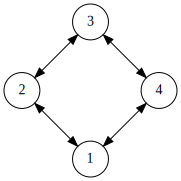

In [1]:
import numpy as np
import pandas as pd

from IPython.display import display, Math

import dtmc
import mcviz

P = np.array([[0, 0.5, 0, 0.5],
              [0.5, 0, 0.5, 0],
              [0, 0.5, 0, 0.5],
              [0.5, 0, 0.5, 0]])

S = [1, 2, 3, 4]

dtmc.disp_dtmc(P, S, frac=True)
display(mcviz.dot_mc(P, list(map(str, S)), bidir=True))

### Exercise 2.2: Maze Examples

For each of the following mazes, write down the state space $\mathcal{S}$ and (one-step) transition probability matrix $\mathbf{P}$.

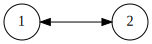

In [2]:
mcviz.dot_mc([[0, 1], [1, 0]], ['1', '2'], bidir=True)

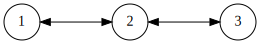

In [3]:
mcviz.dot_mc([[0, 1, 0], [0.5, 0, 0.5], [0, 1, 0]], ['1', '2', '3'], bidir=True)

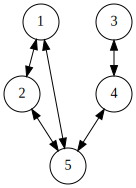

In [4]:
n = 5 # number of rooms
mcviz.dot_mc(dtmc.rand_maze(n, p = [0,0.3,0.4,0.3]), list(map(str, range(1,n+1))), engine='dot', bidir=True)

**Note:** The codeblock above randomly generates a maze with $n$ rooms.  Re-run the codeblock to get new mazes.  You can change the number of rooms.